In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
with open('save_baselines.pickle', 'rb') as handle:
    baselines = pickle.load(handle)

In [76]:
name_map = {
    'sample_IID': 'Sample an entire network checkpoint',
}
for c in [16, 32, 64, 128, 256]:
    name_map[f'sample_filters_IID_{c}'] = f'Sample {c} filters, finetune linear layer'

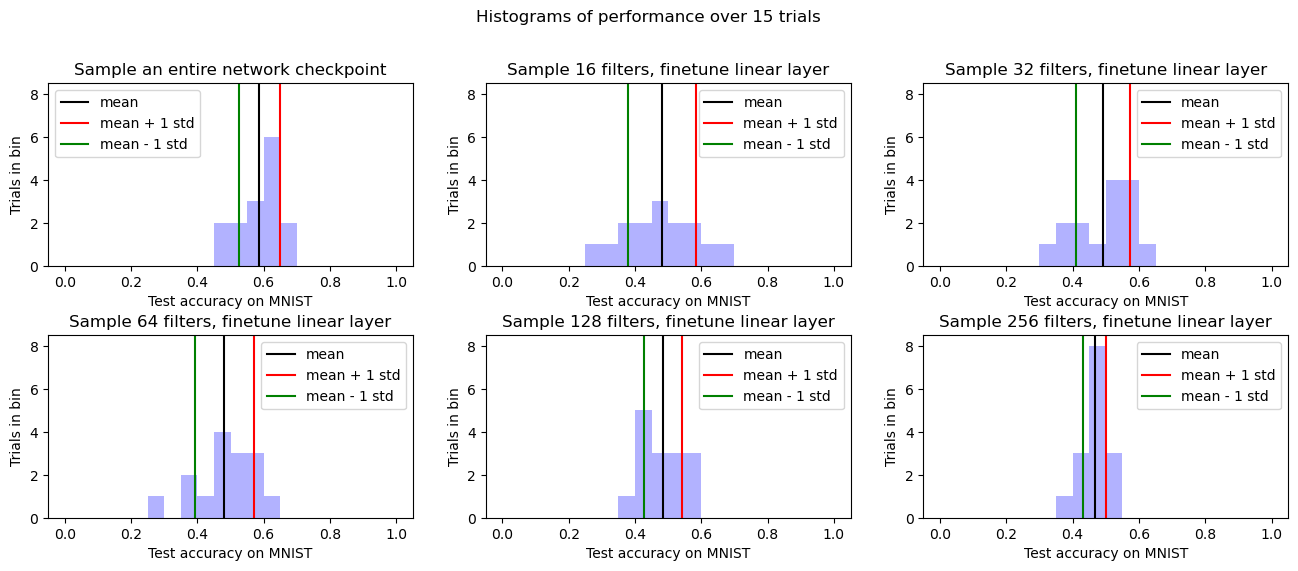

In [80]:
from matplotlib.pyplot import figure

# figure(figsize=(20,10))
fig, axs = plt.subplots(2,3,figsize=(16,6), gridspec_kw={'width_ratios': [2,2,2],'height_ratios': [1, 1]}  )
# print(axs)
plt.suptitle('Histograms of performance over 15 trials')
for name, ax in zip(name_map.keys(), axs.flatten()):
    # plt.clf()
    vec = baselines[name]['acc']
    if len(vec) > 15:
        vec = vec[:15]
    ax.hist(vec, bins=20, range=(0,1), fc=(0, 0, 1, 0.3))
    ax.set_box_aspect(0.5)
    ax.axvline(sum(vec)/len(vec), color='black', label='mean')
    std = np.std(vec)
    ax.axvline(sum(vec)/len(vec) + std, color='red', label='mean + 1 std')
    ax.axvline(sum(vec)/len(vec) - std, color='green', label='mean - 1 std')
    ax.set_xlabel('Test accuracy on MNIST')
    ax.set_ylabel('Trials in bin')
    ax.set_ylim(0, 8.5)
    ax.set_title(name_map[name])
    ax.legend()
    # plt.show()
